# Analysis of the selection

## The component selection: <a class="anchor" id="component_list"></a>

**Namely, after using BoNesis for** <span style="color:green;font-weight:bold">optimization</span>:
* <span style="color:green">maximization of the number of nodes in the model</span>  (nodes with which it is possible to explain the dynamics)
* <span style="color:green">maximization of the number of strong constants</span>  (nodes having a constant value throughout the dynamics)

**selection of the nodes included in the optimized model, by removing its strong constants.**

In [1]:
components = ("ATF3", "ATF7", "CEBPA", "CREM", "E2F1", "EBF1", "ESR1", "FLI1", "FOS", "FOXO3", "FOXP2", "GATA1", "GFI1B", "HBP1", "HNF4A", "IKZF1", "IRF1", "IRF2", "JUN", "JUNB", "KLF1", "KLF6", "MEF2C", "MYB", "MYC", "NFATC1", "NRF1", "RELA", "RUNX1", "SP1", "SPI1", "STAT1", "STAT3", "STAT6", "TBP", "TBX21", "TCF12", "TRP53", "ZEB2")
print(f"Number of nodes : {len(components)}")

Number of nodes : 39


------
## Summary

* [**Comparison with 3 state-of-the-art models**](#Comparison-with-state-of-the-art-models)
* [**The subgraph made of the 39 selected components**](#Subgraph-made-of-the-39-selected-components)
* [**The expression values of these 39 genes in the (binarized) single-cell data**](#Expression-values-of-these-39-genes-in-the-(binarized)-single-cell-data)
     + [Their binarized expression values in the 6 observations (S0 to S5)](#Their-binarized-expression-values-in-the-6-observations-(S0-to-S5):) 
     + [The evolution of their raw expression values, along the differentiation trajectory](#The-evolution-of-their-raw-expression-values,-along-the-differentiation-trajectory:)
------

## Comparison with state-of-the-art models
* **Hamey et al, 2017,** *Reconstructing blood stem cell regulatory network models from single-cell molecular profiles*.
* **Collombet et al, 2017,** *Logical modeling of lymphoid and myeloid cell specification and transdifferentiation*.
* **Moignard et al, 2015,** *Decoding the regulatory network of early blood development from single-cell gene expression measurements*.

In [2]:
hamey = {"BPTF", "PRDM16", "GATA3", "ETV6", "NKX2.3", "HOXA5", "ETS1", "NOTCH", "HOXB4", "GFI1B", "TAL1", "HHEX", "PBX1", "GATA2", "NFE2", "MEIS1", "CBFA2T3H", "ETS2", "GATA1", "LMO2", "LDB1", "IKZF1", "SMARCC1", "FLI1", "LYL1", "HOXA9", "MITF", "RUNX1", "TCF7", "ERG", "MYB"}
collombet = {"CSF1", "CSF1R", "CEBPA", "CEBPB", "MAC1", "RUNX1", "SPI1", "MEF2C", "IKZF1", "GFI1", "EGR1", "E2A", "ID2", "ETS1", "FOXO1", "EBF1", "PAX5", "CD19", "IL7", "IL7R"}
moignard = {"ETV2", "FLI1", "SCL", "GATA1", "NOTCH1", "SOX7", "HOXB4", "LYL1", "IKAROS", "ERG", "PU.1", "MYB", "NFE2", "ETS1", "ETO2", "HHEX", "LMO2", "SOX17", "GFI1", "GFI1B"}

print(f"Hamey: {len(hamey)}")
print(f"Collombet: {len(collombet)}")
print(f"Moignard: {len(moignard)}")

Hamey: 31
Collombet: 20
Moignard: 20


**Gene name standardization:**

*nb: The genes in `components` (the selection of components after the optimization process through BoNesis) are already standardized given "data/Mus_musculus.gene_info.202103.tsv", as they result from [component_selection.ipynb](./component_selection.ipynb).*

In [3]:
import gene_name_standardization as gns

In [4]:
import os
synonyms = gns.synonyms_from_NCBI("data/Mus_musculus.gene_info.202103.tsv")

In [5]:
hamey_ref = gns.set_standardization(hamey, synonyms)
print(f"Hamey's genes standardization:\nbefore:\t{hamey.difference(hamey_ref)}\nafter:\t{hamey_ref.difference(hamey)}")

Hamey's genes standardization:
before:	{'CBFA2T3H', 'NKX2.3'}
after:	{'NKX2-3', 'CBFA2T3'}


In [6]:
collombet_ref = gns.set_standardization(collombet, synonyms)
print(f"Collombet's genes standardization:\nbefore:\t{collombet.difference(collombet_ref)}\nafter:\t{collombet_ref.difference(collombet)}")

Collombet's genes standardization:
before:	{'E2A', 'MAC1'}
after:	{'ITGAM', 'TCF3'}


In [7]:
moignard_ref = gns.set_standardization(moignard, synonyms)
print(f"Moignard' genes standardization:\nbefore:\t{moignard.difference(moignard_ref)}\nafter:\t{moignard_ref.difference(moignard)}")

Moignard' genes standardization:
before:	{'ETO2', 'IKAROS', 'SCL', 'PU.1'}
after:	{'CBFA2T3', 'SCX', 'IKZF1', 'SPI1'}


**Comparison of the models and the component selection with BoNesis:**

In [8]:
print(f"Hamey - Moignard intersection: {len(hamey_ref.intersection(moignard_ref))} genes\n{sorted(hamey_ref.intersection(moignard_ref))}\n")
print(f"Hamey - Collombet intersection: {len(hamey_ref.intersection(collombet_ref))} genes\n{sorted(hamey_ref.intersection(collombet_ref))}\n")
print(f"Collombet - Moignard intersection: {len(collombet_ref.intersection(moignard_ref))} genes\n{sorted(collombet_ref.intersection(moignard_ref))}\n")
print(f"Hamey - Collombet - Moignard: {len(hamey_ref.intersection(moignard_ref).intersection(collombet_ref))} genes\n{sorted(hamey_ref.intersection(moignard_ref).intersection(collombet_ref))}\n")

Hamey - Moignard intersection: 13 genes
['CBFA2T3', 'ERG', 'ETS1', 'FLI1', 'GATA1', 'GFI1B', 'HHEX', 'HOXB4', 'IKZF1', 'LMO2', 'LYL1', 'MYB', 'NFE2']

Hamey - Collombet intersection: 3 genes
['ETS1', 'IKZF1', 'RUNX1']

Collombet - Moignard intersection: 4 genes
['ETS1', 'GFI1', 'IKZF1', 'SPI1']

Hamey - Collombet - Moignard: 2 genes
['ETS1', 'IKZF1']



In [9]:
print(f"Comparison of component selection via BoNesis with:\n")
print(f" - Hamey ({len(hamey)} nds), nb of common genes: {len(set(components).intersection(hamey_ref))}\n{sorted(list(set(components).intersection(hamey_ref)))}\n")
print(f" - Moignard ({len(moignard)} nds), nb of common genes: {len(set(components).intersection(moignard_ref))}\n{sorted(list(set(components).intersection(moignard_ref)))}\n")
print(f" - Collombet ({len(collombet)} nds), nb of common genes: {len(set(components).intersection(collombet_ref))}\n{sorted(list(set(components).intersection(collombet_ref)))}\n")
print(f"Genes in common with the intersection of the three state-of-the-art models and the selection via BoNesis: {len(set(components).intersection(hamey_ref).intersection(moignard_ref).intersection(collombet_ref))}\n{list(set(components).intersection(hamey_ref).intersection(moignard_ref).intersection(collombet_ref))}")

Comparison of component selection via BoNesis with:

 - Hamey (31 nds), nb of common genes: 6
['FLI1', 'GATA1', 'GFI1B', 'IKZF1', 'MYB', 'RUNX1']

 - Moignard (20 nds), nb of common genes: 6
['FLI1', 'GATA1', 'GFI1B', 'IKZF1', 'MYB', 'SPI1']

 - Collombet (20 nds), nb of common genes: 6
['CEBPA', 'EBF1', 'IKZF1', 'MEF2C', 'RUNX1', 'SPI1']

Genes in common with the intersection of the three state-of-the-art models and the selection via BoNesis: 1
['IKZF1']


In [10]:
with_hamey = set(components).intersection(hamey_ref)
with_moignard = set(components).intersection(moignard_ref)
with_collombet = set(components).intersection(collombet_ref)

selected_genes = with_hamey.union(with_moignard).union(with_collombet)

print(f"Hamey, Moignard, Collombet models have {len(hamey_ref.union(moignard_ref).union(collombet_ref))} distinct genes.")
print(f"{len(selected_genes)} over the {len(components)} genes of our selection are in common with those being in state-of-the-art models: \n{sorted(list(selected_genes))}")

Hamey, Moignard, Collombet models have 53 distinct genes.
10 over the 39 genes of our selection are in common with those being in state-of-the-art models: 
['CEBPA', 'EBF1', 'FLI1', 'GATA1', 'GFI1B', 'IKZF1', 'MEF2C', 'MYB', 'RUNX1', 'SPI1']


## Subgraph made of the 39 selected components

In [50]:
import bonesis
import networkx as nx
import pandas as pd

In [51]:
df = pd.read_csv("data/dorothea_ABC_20210707_TF.sif", header=None, names=("in", "sign", "out"), sep="\t")
standardized_dorothea = nx.from_pandas_edgelist(df, "in", "out", ["sign"], nx.MultiDiGraph())
subgraph_from_selection = standardized_dorothea.subgraph(set(components))

In [52]:
print(f"{len(subgraph_from_selection.nodes())} nodes, {len(subgraph_from_selection.edges())} edges")

39 nodes, 137 edges


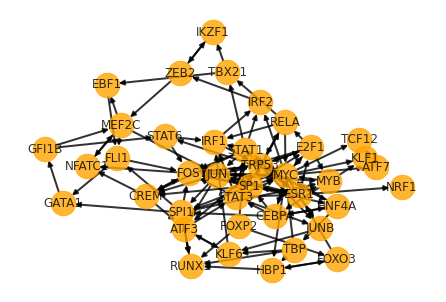

In [68]:
nx.draw_kamada_kawai(subgraph_from_selection, with_labels=True, node_size=600, 
                     node_color="orange", width=2, node_shape="o", alpha=0.8)

**Indegrees**

In [70]:
indegree = dict()
for node in sorted(list(subgraph_from_selection.nodes())):
    #print(f"{node}: {subgraph_from_selection.in_degree[node]}")
    if subgraph_from_selection.in_degree[node] not in indegree.keys():
        indegree[subgraph_from_selection.in_degree[node]] = 1
    else:
        indegree[subgraph_from_selection.in_degree[node]] += 1
indegree = {key:value for key, value in sorted(indegree.items())}

In [71]:
import matplotlib.pyplot as plt

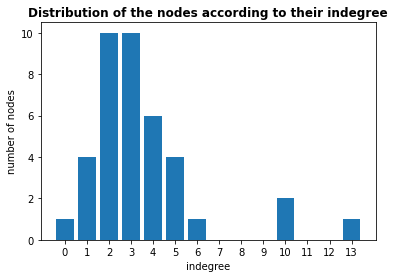

In [81]:
plt.xlabel('indegree')
plt.ylabel('number of nodes')
plt.title("Distribution of the nodes according to their indegree", weight='bold')
plt.bar(indegree.keys(), indegree.values())
plt.xticks(range(14))
plt.show()

## Expression values of these 39 genes in the (binarized) single-cell data

In [103]:
df_nesto = pd.read_csv("data/nestorowa_binarizedObservations.csv", sep=",", index_col=[0])
observations_from_singlecell_nestorowa = df_nesto.to_dict(orient="index")

In [104]:
import gene_name_standardization as gns
# Standardization (according to the gene info from NCBI) of the genes in the single-cell dataset:
standardized_observations = gns.observations_standardization(observations_from_singlecell_nestorowa, 
                                                             "data/Mus_musculus.gene_info.202103.tsv")

### Their binarized expression values in the 6 observations (S0 to S5):

In [152]:
expression_values = dict()
observed_genes = set()

for observation_id in sorted(list(standardized_observations.keys())):
    expression_values[observation_id] = dict()
    for gene in set(subgraph_from_selection.nodes()).intersection(standardized_observations[observation_id]):
        expression_values[observation_id][gene] = standardized_observations[observation_id][gene]
        observed_genes.add(gene)

df_39_expression_values = pd.DataFrame.from_dict(expression_values, orient="index")

In [155]:
df_39_expression_values

,HNF4A,ESR1,IKZF1,SPI1,JUNB,MYB,ZEB2,STAT1,TCF12,IRF1,MEF2C,JUN,FOS,KLF1,GFI1B,GATA1,NFATC1,EBF1,HBP1,STAT6,STAT3,MYC,NRF1,KLF6,ATF7
S0,NaN,0,NaN,1,1,NaN,1,0,0,1,1,1,0,0,0,0,1,NaN,0,0,1,0.0,0,NaN,0
S1,NaN,0,0.0,1,0,NaN,0,0,0,1,1,1,1,0,0,0,0,NaN,1,0,1,0.0,0,1.0,0
S2,NaN,0,0.0,1,1,0.0,0,0,0,1,1,1,1,0,0,0,0,NaN,1,0,1,0.0,0,1.0,0
S3,NaN,0,NaN,1,1,NaN,1,1,0,1,0,0,0,0,0,0,0,0.0,1,1,0,NaN,1,0.0,1
S4,NaN,0,NaN,1,1,NaN,1,0,1,1,1,0,0,0,0,0,0,0.0,1,1,1,NaN,0,0.0,1
S5,NaN,0,1.0,0,1,1.0,0,0,0,0,1,1,1,1,1,1,0,1.0,1,0,1,NaN,0,0.0,0


### The evolution of their raw expression values, along the differentiation trajectory:

memo for scatterplot :
* S1 S0 S3 S5 : 1323 points <-> 13.23 in
* S1 S0 S3 S4 : 903 points <-> 9.03
* S1 S0 S2 : 747 points <-> 7.47

In [126]:
df_raw = pd.read_csv("data/raw_singlecell_data_nestorowa.tsv", sep="\t", index_col=0) #, usecols=col_list)
df_raw_t = df_raw.transpose()
df_raw_t.columns = df_raw_t.columns.str.upper()

In [127]:
df_raw_t

CLEC1B     KDM3A    CORO2B  8430408G22RIK  CLEC9A      PHF6  \
HSPC_025       0.0  4.891604  1.426148            0.0     0.0  2.599758   
HSPC_031       0.0  6.877725  0.000000            0.0     0.0  2.423483   
HSPC_037       0.0  0.000000  6.913384            0.0     0.0  2.051659   
LT-HSC_001     0.0  0.000000  8.178374            0.0     0.0  6.419817   
HSPC_001       0.0  0.000000  9.475577            0.0     0.0  7.733370   
...            ...       ...       ...            ...     ...       ...   
Prog_834       0.0  5.264737  0.000000            0.0     0.0  1.752731   
Prog_840       0.0  4.925369  0.599847            0.0     0.0  7.049488   
Prog_846       0.0  1.277098  0.000000            0.0     0.0  7.745012   
Prog_852       0.0  1.878352  0.000000            0.0     0.0  4.092486   
Prog_810       0.0  3.374163  0.000000            0.0     0.0  7.083551   

               USP14  TMEM167B     KBTBD7      RAG2    HMGCS1    ADGRE1  \
HSPC_025    2.954035  6.357369   2.129140  1.426148  7.348544  1.426148   
HSPC_031    1.804914  0.000000   0.000000  0.000000  0.000000  0.000000   
HSPC_037    8.265465  0.000000   1.363402  0.000000  6.816047  0.000000   
LT-HSC_001  3.453502  2.579528   2.579528  0.000000  8.489349  0.000000   
HSPC_001    1.478900  0.000000  10.045601  0.532906  0.532906  0.000000   
...              ...       ...        ...       ...       ...       ...   
Prog_834    7.909088  1.276184   1.276184  0.000000  7.836152  0.000000   
Prog_840    8.808974  5.824770   4.973511  0.599847  5.469454  0.000000   
Prog_846    9.187885  6.525201   5.248354  0.000000  5.726779  0.000000   
Prog_852    8.958552  0.000000   6.391854  1.225444  2.667460  0.000000   
Prog_810    8.015765  6.816733   4.224691  1.777755  4.810707  0.000000   

              ZFP947     ATAD2    BHLHB9     VCAM1      MNS1    TBC1D5  SARDH  \
HSPC_025    0.000000  3.679309  5.781177  0.000000  3.238239  5.908210    0.0   
HSPC_031    0.000000  3.084447  0.699126  0.000000  1.521334  5.354217    0.0   
HSPC_037    0.000000  1.363402  2.051659  1.363402  2.051659  2.866245    0.0   
LT-HSC_001  0.000000  2.579528  8.227117  2.579528  2.579528  2.579528    0.0   
HSPC_001    0.000000  1.226829  8.973845  0.000000  2.564437  9.193444    0.0   
...              ...       ...       ...       ...       ...       ...    ...   
Prog_834    0.961982  5.957565  5.134525  0.000000  5.479206  5.228718    0.0   
Prog_840    0.000000  7.453337  2.621891  0.599847  5.597864  4.399629    0.0   
Prog_846    4.881184  8.165537  0.775476  0.000000  2.580696  2.188646    0.0   
Prog_852    5.497071  8.874662  5.315057  0.000000  8.424579  6.321174    0.0   
Prog_810    5.329474  6.617018  5.846975  0.429738  3.374163  5.226271    0.0   

               WDR75   SLC17A9      BIVM     VPS35   SLC18A1      NEK1  \
HSPC_025    6.627350  0.000000  1.426148  9.248928  0.000000  0.000000   
HSPC_031    6.774690  1.168027  0.000000  7.669907  0.000000  0.699126   
HSPC_037    8.243170  6.795765  8.033993  8.181977  0.000000  0.000000   
LT-HSC_001  3.993885  0.000000  2.579528  6.143315  0.000000  8.528769   
HSPC_001    9.099030  7.869154  0.000000  0.000000  0.532906  0.532906   
...              ...       ...       ...       ...       ...       ...   
Prog_834    7.108354  0.559729  0.000000  8.637368  0.000000  0.961982   
Prog_840    8.397216  0.000000  0.599847  8.144706  0.000000  0.000000   
Prog_846    8.245533  6.007782  0.000000  7.442582  0.000000  4.435688   
Prog_852    6.701093  6.481010  5.733156  6.908169  0.000000  5.161691   
Prog_810    7.003883  0.760415  0.760415  8.332313  0.000000  5.516065   

             FAM107B      PLD3  RAB11FIP4    ATP1B2  ANKRD6  CAR8     WDR36  \
HSPC_025    2.954035  2.129140   0.000000  2.954035     0.0   0.0  9.481236   
HSPC_031    6.870055  0.000000   0.000000  2.582114     0.0   0.0  4.206220   
HSPC_037    9.649589  2.051659   0.000000  2.051659     0.0   0.0  1.363402   
LT-HSC_001  9.224708  8.567140  

In [158]:
df_39_expression_values["CREB5"]

KeyError: 'CREB5'